In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
import statsmodels.formula.api as smf
from pandas import read_csv
import pandas as pd
from collections import Counter

from sklearn.preprocessing import StandardScaler
%matplotlib inline

train = pd.read_csv('dataset/sales_train.csv')
test = pd.read_csv('dataset/test.csv')
items = pd.read_csv('dataset/items.csv')

In [44]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [71]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [72]:
test.describe()

,ID,shop_id,item_id
count,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627
std,61834.358168,17.561933,6252.644590
min,0.000000,2.000000,30.000000
25%,53549.750000,16.000000,5381.500000
50%,107099.500000,34.500000,11203.000000
75%,160649.250000,47.000000,16071.500000
max,214199.000000,59.000000,22167.000000


In [46]:
items.describe()

,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


In [47]:
print(train.shape, test.shape)

(2935849, 6) (214200, 3)


In [48]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [49]:
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
5,2013-01-10,0,25,2564,349.00,1.0
6,2013-01-02,0,25,2565,549.00,1.0
7,2013-01-04,0,25,2572,239.00,1.0
8,2013-01-11,0,25,2572,299.00,1.0
9,2013-01-03,0,25,2573,299.00,3.0


In [50]:
# According to the item and shop, it shows the'date_block_num'
# Use 0 to fill the null number if exits
dataset = train.pivot_table(index=['item_id', 'shop_id'],values=['item_cnt_day'], columns='date_block_num', fill_value=0)
dataset.head()


item_cnt_day                                               \
date_block_num            0    1    2    3    4    5    6    7    8    9    
item_id shop_id                                                             
0       54               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1       55               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2       54               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3       54               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4       54               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                ...                                                     
date_block_num  ...    24   25   26   27   28   29   30   31   32   33  
item_id shop_id ...                                                     
0       54      ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1       55      ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2       54      ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3       54      ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4       54      ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 34 columns]

In [51]:
dataset = dataset.reset_index()
dataset.head()

item_id shop_id item_cnt_day                                \
date_block_num                            0    1    2    3    4    5    6   
0                    0      54          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1                    1      55          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2                    2      54          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3                    3      54          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4                    4      54          0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                    ...                                                     
date_block_num    7 ...    24   25   26   27   28   29   30   31   32   33  
0               0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1               0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2               0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3               0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4               0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 36 columns]

In [52]:
dataset = pd.merge(test, dataset, on=['item_id', 'shop_id'], how='left')
dataset = dataset.fillna(0)
dataset.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.5,1.0,0.0,1.0,1.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
dataset = dataset.drop(['shop_id', 'item_id', 'ID'], axis=1)
dataset.head()

,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.5,1.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
X_train = np.expand_dims(dataset.values[:, :-1], axis=2)
y_train = dataset.values[:, -1:]

X_test = np.expand_dims(dataset.values[:, 1:], axis=2)

print(X_train.shape, y_train.shape, X_test.shape)

(214200, 33, 1) (214200, 1) (214200, 33, 1)


In [61]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
model = Sequential()
model.add(LSTM(units=64, input_shape=(33, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mean_squared_error'])
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [62]:
history = model.fit(X_train, y_train, batch_size=4096, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
214200/214200 [==============================] - 32s 149us/step - loss: 1.3744 - mean_squared_error: 1.3744
Epoch 2/10
214200/214200 [==============================] - 29s 137us/step - loss: 1.3639 - mean_squared_error: 1.3639
Epoch 3/10
214200/214200 [==============================] - 30s 142us/step - loss: 1.3598 - mean_squared_error: 1.3598
Epoch 4/10
214200/214200 [==============================] - 31s 143us/step - loss: 1.3554 - mean_squared_error: 1.3554
Epoch 5/10
214200/214200 [==============================] - 35s 163us/step - loss: 1.3427 - mean_squared_error: 1.3427
Epoch 6/10
214200/214200 [==============================] - 34s 157us/step - loss: 1.3622 - mean_squared_error: 1.3622
Epoch 7/10
214200/214200 [==============================] - 32s 150us/step - loss: 1.3541 - mean_squared_error: 1.3541
Epoch 8/10
214200/214200 [==============================] - 32s 148us/step - loss: 1.3343 - mean_squared_error: 1.3343


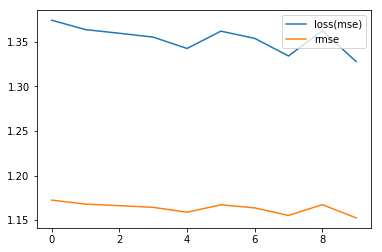

In [63]:
plt.plot(history.history['loss'], label= 'loss(mse)')
plt.plot(np.sqrt(history.history['mean_squared_error']), label= 'rmse')
plt.legend(loc=1)

In [76]:
LSTM_prediction = model.predict(X_test)
LSTM_prediction

array([[0.37893435],
       [0.05197212],
       [0.50959   ],
       ...,
       [0.05626148],
       [0.05197212],
       [0.04238176]], dtype=float32)

In [65]:
LSTM_prediction = LSTM_prediction.clip(0, 20)

In [67]:
submission = pd.DataFrame({'ID': test['ID'], 'item_cnt_month': LSTM_prediction.ravel()})
submission.to_csv('submission.csv',index=False)
